# Link between DS9 and Python

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [28]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

In [3]:
from pyds9 import *


An instance of ds9 was found to be running before we could
start the 'xpans' name server. You will need to perform a
bit of manual intervention in order to connect this
existing ds9 to Python.

For ds9 version 5.7 and beyond, simply register the
existing ds9 with the xpans name server by selecting the
ds9 File->XPA->Connect menu option. Your ds9 will now be
fully accessible to pyds9 (e.g., it appear in the list
returned by the ds9_targets() routine).

For ds9 versions prior to 5.7, you cannot (easily) register
with xpans, but you can view ds9's File->XPA Information
menu option and pass the value associated with XPA_METHOD
directly to the Python DS9() constructor, e.g.:

    d = DS9('a000101:12345')

The good news is that new instances of ds9 will be
registered with xpans, and will be known to ds9_targets()
and the DS9() constructor.



In [6]:
print ds9_targets()

None


In [7]:
d=DS9()

In [8]:
d.set('regions', 'fk5; circle(345.29,58.87,212.58")')


1

In [36]:
hdul = d.get_pyfits()

In [37]:
hdul.info()

Filename: StringIO.StringIO
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     107   (530, 530)   int16   


In [39]:
hdul[0].header

SIMPLE  =                    T /                                                
BITPIX  =                   16 /No.Bits per pixel                               
NAXIS   =                    2 /                                                
NAXIS1  =                  530 /Length X axis                                   
NAXIS2  =                  530 /Length Y axis                                   
DATE    = '21/05/17          ' /Date of FITS file creation                      
ORIGIN  = 'CASB -- STScI     ' /Origin of FITS image                            
PLTLABEL= 'PJ 00323.0        ' /Observatory plate label                         
PLATEID = '0738              ' /GSSS Plate ID                                   
REGION  = 'XX005             ' /GSSS Region Name                                
DATE-OBS= '17/12/85          ' /UT date of Observation                          
UT      = '06:23:00.00       ' /UT time of observation                          
EPOCH   =  1.9859595947266E+

In [40]:
wcs = WCS(hdul[0].header)

In [14]:
image_data = hdul[0].data

In [17]:
image_data.shape

(530, 530)

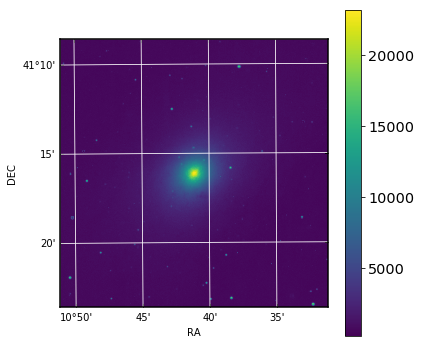

In [44]:
plt.subplot(projection=wcs)
plt.imshow(image_data)
plt.colorbar()
plt.grid(color='white', ls='solid')
plt.xlabel('RA')
plt.ylabel('DEC')


In [21]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))


('Min:', 214)
('Max:', 23187)
('Mean:', 1235.029124243503)
('Stdev:', 1412.9887897502567)


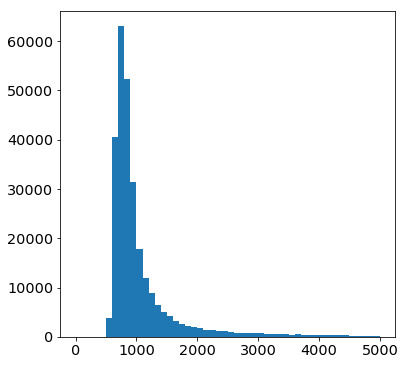

In [27]:
NBINS = 50
histogram = plt.hist(image_data.flatten(), NBINS,[0,5000.])